In [49]:
variable= 'pct_ch_hinc00_16'
binary6typ = variable+'_binary'
model_name = '1_CENSUS_'+variable

# Analysis of Foursquare Data
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing

    
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - imports Census data
    
1. Part II. Data Processing
    - Performs a classifcation task on Typologies
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [50]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Polygon', 'figure', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
- import Foursquare data
- imports the Census Tract shapefile
- import Typologies
- merges topologies
- Spatail join by Census Tract
- merges topologies
- map topologies
- map Businesses
- outputs a .csv of the results
- You can refer to https://github.com/mv1742/updny_2

# Foursquare Data
- import Foursquare data

# Census Tract shapefile
- imports the Census Tract shapefile


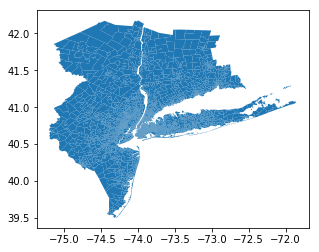

In [51]:
# url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# NYCzip = getGeoDataFrameFromShpFileZipUrl(url)
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()


In [52]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [53]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

# Typologies
- import raw Typology file with Census data 'NY_final_data_for_typologies_1.19.19.csv'
- merges Typologies with the new Binary typologies
- map topologies

In [54]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)
len(Typologiesgdp.columns)

82

In [55]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','Type_1.19']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typologiesgdp = Typologiesgdp.loc[:,cols_typ]
Typologiesgdp.head()

<class 'numpy.float64'>


,GEOID,Type_1.19
0,9.001010e+09,VHI - Super Gentrification or Exclusion
1,9.001010e+09,VHI - Super Gentrification or Exclusion
2,9.001010e+09,VHI - Super Gentrification or Exclusion
3,9.001010e+09,VHI - Super Gentrification or Exclusion
4,9.001010e+09,VHI - Super Gentrification or Exclusion


In [56]:
Binaries=pd.read_csv('./Data/NEW_6_BINARIES_ALL.csv')
len(Binaries.columns), Binaries.shape
Binaries.drop(columns = 'Unnamed: 0', inplace=True)
Binaries.head()

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16,GEOID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34013021601
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34003031100
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34003036200
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34017003500
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34017015500


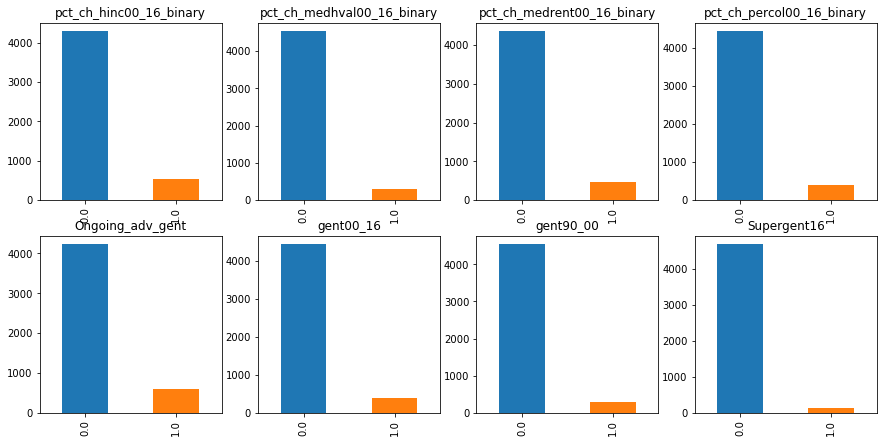

In [57]:
bin_typs = ['pct_ch_hinc00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','pct_ch_percol00_16_binary','Ongoing_adv_gent',
            'gent00_16','gent90_00','Supergent16']
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    Binaries[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    Binaries[column].value_counts()/Binaries[column].value_counts().sum()

In [58]:
Typologiesgdp = Typologiesgdp.merge(Binaries, on= 'GEOID')
Typologiesgdp.shape

(4829, 10)

In [59]:
Typologiesgdp.isnull().sum()


GEOID                         0
Type_1.19                     0
pct_ch_percol00_16_binary     0
pct_ch_hinc00_16_binary       0
pct_ch_medhval00_16_binary    0
pct_ch_medrent00_16_binary    0
Ongoing_adv_gent              0
gent00_16                     0
gent90_00                     0
Supergent16                   0
dtype: int64

In [60]:
merged = NYCzip.merge(Typologiesgdp,on='GEOID')
merged.tail(1)

,GEOID,geometry,Type_1.19,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
4828,36047152200,"POLYGON ((-73.96408699991511 40.6444069999831,...",MHI - Stable or Early Stage of Exclusion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (4829, 11)


(4829, 11)

In [62]:
# LOAD FOURSQUARE DATA

In [63]:
# # Neighbours
# X_foursquare_neighbours = pd.read_csv('Improve_Features/X_foursquare-neighbours.csv')
# print(X_foursquare_neighbours.shape,X_foursquare_neighbours.columns)
# X_foursquare_neighbours.drop(['Unnamed: 0'],axis =1, inplace=True)
# cols_neighbours = []
# for column in X_foursquare_neighbours.columns:
#     if '_sum10' in column:
#         cols_neighbours.append(column)
# cols_neighbours = cols_neighbours + ['GEOID']

In [64]:
# # Distances
# X_foursquare_high = pd.read_csv('Improve_Features/X_foursquare-distances_high.csv')

# print(X_foursquare_high.shape,X_foursquare_high.columns)
# cols_high = []
# for column in X_foursquare_high.columns:
#     if 'distance' in column:
#         cols_high.append(column)
# cols_high = cols_high + ['GEOID']
# cols_high

In [65]:
# X_foursquare_low = pd.read_csv('Improve_Features/X_foursquare-distances_low.csv')
# print(X_foursquare_low.shape,X_foursquare_low.columns)
# cols_low = []
# for column in X_foursquare_low.columns:
#     if 'distance' in column:
#         cols_low.append(column)
# cols_low = cols_low + ['GEOID']
# cols_low

In [66]:
# # Distances- numeric 
# X_foursquare_numeric = pd.read_csv('Improve_Features/X_foursquare-distances_numeric.csv')
# print(X_foursquare_numeric.shape,X_foursquare_numeric.columns)
# cols_numeric = []
# for column in X_foursquare_numeric.columns:
#     if 'distance' in column:
#         cols_numeric.append(column)
# cols_numeric = cols_numeric + ['GEOID']
# cols_numeric
# # Distances- cats 
# X_foursquare_cats1 = pd.read_csv('Improve_Features/X_foursquare-distances_cats.csv')
# print(X_foursquare_cats1.shape,X_foursquare_cats1.columns)
# cols_cats1 = []
# for column in X_foursquare_cats1.columns:
#     if 'distance' in column:
#         cols_cats1.append(column)
# cols_cats1 = cols_cats1 + ['GEOID']
# cols_cats1
# # Distances- class
# X_foursquare_class = pd.read_csv('Improve_Features/X_foursquare-distances_class.csv')
# print(X_foursquare_class.shape,X_foursquare_cats1.columns)
# cols_class = []
# for column in X_foursquare_class.columns:
#     if 'distance' in column:
#         cols_class.append(column)
# cols_class = cols_class + ['GEOID']
# cols_class

In [67]:
# X_foursquare_neighbours = X_foursquare_neighbours.loc[:,cols_neighbours]
# X_foursquare_high = X_foursquare_high.loc[:,cols_high]
# X_foursquare_class = X_foursquare_class.loc[:,cols_class]
# X_foursquare_cats1 = X_foursquare_cats1.loc[:,cols_cats1]
# X_foursquare_numeric = X_foursquare_numeric.loc[:,cols_numeric]
# X_foursquare_low = X_foursquare_low.loc[:,cols_low]
# # X_foursquare_person = X_foursquare_person.loc[:,cols_person]
# # X_foursquare_income = X_foursquare_income.loc[:,cols_income]

In [68]:
# # X_foursquare_low.shape, X_foursquare_person.shape
# print(X_foursquare_high.shape)

In [69]:
X_foursquare_data_sjoined = pd.read_csv('./Data/data_sjoined_sum_merged.csv')
X_foursquare_data_sjoined.drop(columns=['Unnamed: 0','Typologies'],inplace=True)
print(X_foursquare_data_sjoined.shape)
print(X_foursquare_data_sjoined.shape,X_foursquare_data_sjoined.columns)
cols_datasjoined = []
for column in X_foursquare_data_sjoined.drop(columns=['geometry']).columns:
    if 'Type' not in column:
        cols_datasjoined.append(column)
cols_datasjoined = cols_datasjoined
cols_datasjoined

(3009, 711)
(3009, 711) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Mobility', 'Category_Nutrition', 'Category_Personal care',
       'Category_Social', 'Category_Taking care', 'Category_Unknown', 'Class_',
       'Class_Necessary', 'Class_Optional', 'geometry'],
      dtype='object', length=711)


['GEOID',
 'Rating',
 'Checkins',
 'Users',
 'Visits',
 'Category_Civic',
 'Category_Consumption',
 'Category_Education',
 'Category_Income',
 'Category_Leisure',
 'Category_Mobility',
 'Category_Nutrition',
 'Category_Personal care',
 'Category_Social',
 'Category_Taking care',
 'Category_Unknown',
 'Class_',
 'Class_Necessary',
 'Class_Optional']

In [70]:
X_foursquare_data_sjoined_all = X_foursquare_data_sjoined.drop(columns=['geometry'])

In [71]:
# # X_foursquare_data_sjoined_pca = X_foursquare_data_sjoined.drop(columns=['geometry']).iloc[:,7:698]

# X_foursquare_data_sjoined_non_type = X_foursquare_data_sjoined.loc[:,cols_datasjoined]
# X_foursquare_data_sjoined_non_type.head(1)

In [72]:
# X_foursquare_data_sjoined_other1 = X_foursquare_data_sjoined.drop(columns=['geometry']).iloc[:,698:]
# X_foursquare_data_sjoined_other1.head(1)

In [73]:
# X_foursquare_data_sjoined_other2 = X_foursquare_data_sjoined.drop(columns=['geometry']).iloc[:,:7]
# X_foursquare_data_sjoined_other2.head(1)

In [74]:
# LOAD TWITTER DATA

In [75]:
# # alltwitterandcensusdata.csv
# alltwitterandcensusdata = pd.read_csv('Data/alltwitterandcensusdata.csv')
# alltwitterandcensusdata.rename(columns={'geojoin': "GEOID"},inplace=True)
# alltwitterandcensusdata.drop(columns='Unnamed: 0',inplace=True)
# print(alltwitterandcensusdata.shape)
# twittercols = list(alltwitterandcensusdata.columns[:-23])+['distToHighVisitorTract',\
#                                                      'distToHighTweetTract','distToMHI']
# print('twittercols------------------------------')
# print(list(twittercols))
# print('alltwitterandcensusdata------------------------------')
# print(list(alltwitterandcensusdata.columns))
# twitterdata  = alltwitterandcensusdata.loc[:,twittercols]

# LOAD CENSUS DATA

In [76]:
Censuspd_TOD = pd.read_stata('Data/UDP_NYC_Variables.dta')
Censuspd_TOD.rename(columns={'GEOid2': "GEOID"},inplace=True)
Censuspd_TOD = Censuspd_TOD.loc[:,['GEOID','TOD']]
Censuspd_TOD.head(2)

,GEOID,TOD
0,09001010101,0.0
1,09001010102,0.0


In [77]:
# NO GEOID
Census_data_original_NOGEOID = pd.read_csv('./Data/originalcensusfeatures.csv')
Census_data_original_NOGEOID.drop(columns='Unnamed: 0',inplace=True)
cols_orig = list(Census_data_original_NOGEOID.columns)
print(cols_orig)
Census_data_original_NOGEOID.head(2)

['medrent00', 'medhval00', 'percol00', 'per_rent_00', 'pernwh00', 'hinc00', 'TOD', 'carcommuters_00']


,medrent00,medhval00,percol00,per_rent_00,pernwh00,hinc00,TOD,carcommuters_00
0,988.0,273900.0,0.231504,0.066202,0.072632,120523.998898,0.0,0.875731
1,808.0,192600.0,0.155385,0.439133,0.212597,72720.400000,1.0,0.736007


In [78]:
cols_orig_noTOD = ['medrent00', 'medhval00', 'percol00', 'per_rent_00', 'pernwh00', 'hinc00', 'carcommuters_00']
Census_data_original=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Census_data_original.rename(columns={'geoid': "GEOID"},inplace=True)
Census_data_original = Census_data_original.loc[:,cols_orig_noTOD+['GEOID']]
Census_data_original.loc[:,cols_orig_noTOD+['GEOID']].head(2)

,medrent00,medhval00,percol00,per_rent_00,pernwh00,hinc00,carcommuters_00,GEOID
0,1601.0,1000001.0,0.354071,0.128119,0.066080,273976.05,0.698276,9.001010e+09
1,1244.0,1000000.0,0.748477,0.108108,0.098972,290000.00,0.000000,9.001010e+09


In [79]:
Census_data_new = pd.read_csv('./Data/newcensusfeatures.csv')
Census_data_new.rename(columns={'geoid': "GEOID"},inplace=True)
Census_data_new.drop(columns=['geojoin','Unnamed: 0'],inplace=True)
Census_data_new.head(2)

,GEOID,pop00,phisp00,pnhblk00,pasian00,popden00,unempden00,pag25up00
0,34003001000,6683.181012,0.025387,0.004034,0.065236,7.729906e+06,96913.273415,0.653295
1,34003002100,2183.000000,0.025195,0.016949,0.199267,1.230491e+06,15219.084062,0.700870


In [80]:
Census_data_original['GEOID'] = pd.to_numeric(Census_data_original['GEOID'])
Censuspd_TOD['GEOID'] = pd.to_numeric(Censuspd_TOD['GEOID'])
Census_data_new['GEOID']  = pd.to_numeric(Census_data_new['GEOID'])

In [81]:
# Merge Censuspd_TOD, Census_data_original, Census_data_new
print(Censuspd_TOD.shape, Census_data_original.shape, Census_data_new.shape)
Census_new_temp = Censuspd_TOD.merge(Census_data_original,on='GEOID')
print(Census_new_temp.shape)
Census_combined = Census_data_new.merge(Census_new_temp,on='GEOID')
print(Census_combined.shape)
# (Census_combined.GEOID==Census_combined.geojoin).sum()

(5338, 2) (5298, 8) (5276, 8)
(5291, 9)
(5272, 16)


# Combine Datasets

In [82]:
### Combine FQ DATA::

In [83]:
# X_foursquare = X_foursquare_high.merge(X_foursquare_neighbours, on='GEOID')
# print(X_foursquare.shape)
# X_foursquare = X_foursquare.merge(X_foursquare_low, on='GEOID')
# print(X_foursquare.shape)
# X_foursquare = X_foursquare.merge(X_foursquare_class, on='GEOID')
# print(X_foursquare.shape)
# X_foursquare = X_foursquare.merge(X_foursquare_numeric, on='GEOID')
# print(X_foursquare.shape)
# X_foursquare = X_foursquare.merge(X_foursquare_cats1, on='GEOID')
# print(X_foursquare.shape)
# X_foursquare = X_foursquare.merge(X_foursquare_data_sjoined_all, on='GEOID')
# print(X_foursquare.shape)
# print(X_foursquare.shape)
# print(X_foursquare_low.shape[1],X_foursquare_numeric.shape[1],X_foursquare_cats1.shape[1], X_foursquare_class.shape[1],X_foursquare_high.shape[1])
# X_foursquare_low.shape,X_foursquare_numeric.shape,X_foursquare_cats1.shape, X_foursquare_class.shape,X_foursquare_high.shape,X_foursquare_neighbours.shape

In [84]:
# # Combine TW+FQ+Census
# - twitterdata 
# - X_foursquare
# - Census_combined

In [85]:
# print(X_foursquare.shape)
# TW_FQpd = twitterdata.merge(X_foursquare,on='GEOID')
# print(TW_FQpd.shape)

In [86]:
# print(TW_FQpd.shape,TW_FQpd.columns)
# TW_FQpd_temp = TW_FQpd.merge(mergedgpd, on ='GEOID')
# print(TW_FQpd_temp.shape,TW_FQpd_temp.columns[:10])
# TW_FQpd_temp = gpd.GeoDataFrame(TW_FQpd_temp)
# figure, ax = plt.subplots()
# TW_FQpd_temp.plot(column='GEOID',legend = True, ax=ax)

In [87]:
print(X_foursquare_data_sjoined_all.shape)
Census_FQpd = Census_combined.merge(X_foursquare_data_sjoined_all,on='GEOID')
census_cols_all = list(Census_combined.columns)
print(Census_FQpd.shape)
Census_FQpd = Census_FQpd.loc[:,census_cols_all]
print(Census_FQpd.shape)
Census_FQpd.loc[:,census_cols_all].head(2)


(3009, 710)
(2997, 725)
(2997, 16)


,GEOID,pop00,phisp00,pnhblk00,pasian00,popden00,unempden00,pag25up00,TOD,medrent00,medhval00,percol00,per_rent_00,pernwh00,hinc00,carcommuters_00
0,34003003200,4484.0,0.21744,0.065120,0.176405,3.379735e+07,670821.536160,0.701383,0.0,832.0,168500.0,0.247377,0.536743,0.476583,67178.5,0.000000
1,34003003401,2536.0,0.12500,0.042192,0.167192,3.140697e+07,334380.163719,0.658555,0.0,1000.0,189000.0,0.251848,0.054958,0.351928,114596.4,0.717579


## ADD GEOMETRY & TYPOLOGIES

In [88]:
print(Census_FQpd.shape,Census_FQpd.columns)
Census_FQpd = Census_FQpd.merge(mergedgpd, on ='GEOID')
print(Census_FQpd.shape,Census_FQpd.columns[:10])

(2997, 16) Index(['GEOID', 'pop00', 'phisp00', 'pnhblk00', 'pasian00', 'popden00',
       'unempden00', 'pag25up00', 'TOD', 'medrent00', 'medhval00', 'percol00',
       'per_rent_00', 'pernwh00', 'hinc00', 'carcommuters_00'],
      dtype='object')
(2702, 26) Index(['GEOID', 'pop00', 'phisp00', 'pnhblk00', 'pasian00', 'popden00',
       'unempden00', 'pag25up00', 'TOD', 'medrent00'],
      dtype='object')


In [89]:
Census_FQpd.columns[-10:]

Index(['geometry', 'Type_1.19', 'pct_ch_percol00_16_binary',
       'pct_ch_hinc00_16_binary', 'pct_ch_medhval00_16_binary',
       'pct_ch_medrent00_16_binary', 'Ongoing_adv_gent', 'gent00_16',
       'gent90_00', 'Supergent16'],
      dtype='object')

In [90]:
typologies = ['Type_1.19','pct_ch_percol00_16_binary','pct_ch_hinc00_16_binary',\
           'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','pct_ch_percol00_16_binary','Ongoing_adv_gent',
                                        'gent00_16',
                                        'gent90_00',
                                      'Supergent16']

In [91]:
Census_FQpd = gpd.GeoDataFrame(Census_FQpd)

In [92]:
print(Census_FQpd.shape)
Census_FQpd.dropna(inplace=True)
print(Census_FQpd.shape)

(2702, 26)
(2702, 26)


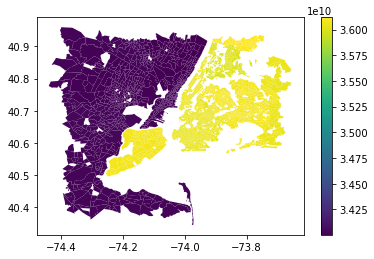

In [93]:
figure, ax = plt.subplots()
Census_FQpd.plot(column='GEOID',legend = True, ax=ax)

# Part II. Modeling

In [94]:
Census_FQpd_beforedrops = Census_FQpd.copy()


In [95]:
binary6typ


'pct_ch_hinc00_16_binary'

In [96]:
### Preprocessing Data

y = Census_FQpd[binary6typ]
X_Census_FQpd = Census_FQpd.drop(typologies+['GEOID','geometry'],axis =1).copy()
print(X_Census_FQpd.shape)
X_Census_FQpd.dropna(inplace=True)
print(X_Census_FQpd.shape)

(2702, 15)
(2702, 15)


In [97]:
X_Census_FQpd.columns

Index(['pop00', 'phisp00', 'pnhblk00', 'pasian00', 'popden00', 'unempden00',
       'pag25up00', 'TOD', 'medrent00', 'medhval00', 'percol00', 'per_rent_00',
       'pernwh00', 'hinc00', 'carcommuters_00'],
      dtype='object')

In [98]:
# Normalize

min_max_scaler = MinMaxScaler()

models = ['Raw','Scaled','Minmaxed']
Xdata_scaled = preprocessing.scale(X_Census_FQpd)
# ydata_scaled = preprocessing.scale(y)

Xdata_minmaxed = min_max_scaler.fit_transform(X_Census_FQpd)
# ydata_minmaxed = min_max_scaler.fit_transform(y)

dictx = {}
dictx['Raw'] = X_Census_FQpd
dictx['Scaled'] = Xdata_scaled
dictx['Minmaxed'] = Xdata_minmaxed
                    

# x = dictx[model][0]
# y = dictx[model][1]

In [99]:
model_f1_scores = {}
model_recall_scores = {}
model_precision_scores = {}
imp_dict = {}
names_dict ={}
model = {}
modelslist = ['Logit','DT','RF','SVM'] 
for m in models:
    # X_train[m], X_test[m], y_train[m], y_test[m]
    dictx[m]
    model[m] = {}
    model_f1_scores[m] = {}
    model_recall_scores[m] ={}
    model_precision_scores[m] = {}
    imp_dict[m] = {}
    names_dict[m] = {}
resultset=Census_FQpd_beforedrops.copy()

In [100]:
X_train = {}
X_test = {}
y_train = {}
y_test = {}
for m in models:

    X_train[m], X_test[m], y_train[m], y_test[m] = train_test_split(dictx[m], y, test_size = 0.3, random_state = 1)    
    #x >> dictx[m][0]
    # y =>> dictx[m][1]
    print(X_train[m].shape, X_test[m].shape, y_train[m].shape, y_test[m].shape)

(1891, 15) (811, 15) (1891,) (811,)
(1891, 15) (811, 15) (1891,) (811,)
(1891, 15) (811, 15) (1891,) (811,)


In [101]:
model
def f_importances_neg(coef, names,m):
    
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[:20]
    names = names[:20]
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)  
    plt.xticks(size = 8)
    plt.show()
def f_importances_pos(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[-20:]
    names = names[-20:]
    plt.figure(figsize=(5,5))
    plt.title('Positive Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()
def f_importances_unimp(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    lenimp_2 = len(imp)//2
    imp = imp[lenimp_2-10:lenimp_2+10]
    names = names[lenimp_2-10:lenimp_2+10]
    plt.figure(figsize=(5,5))
    plt.title('Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()
def f_importances_all(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()

# LR

(1, 15)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


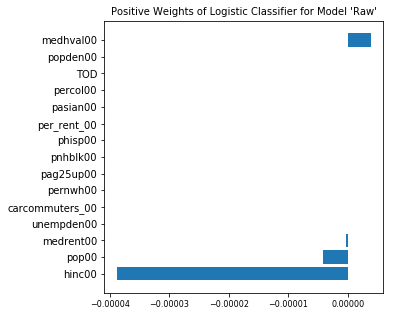

(1, 15)


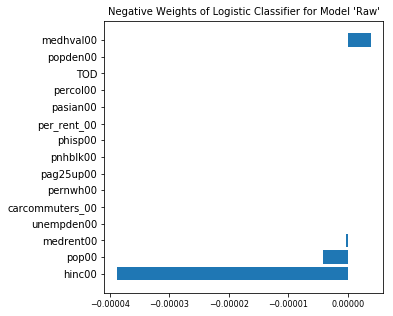

(1, 15)


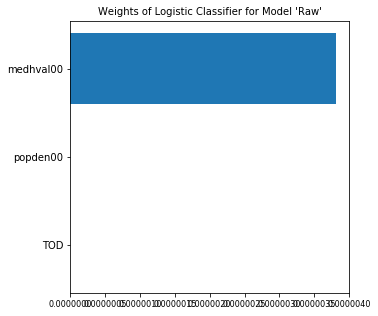

(1, 15)


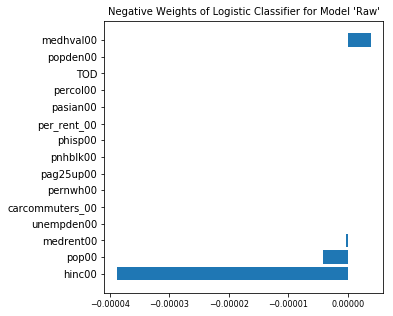

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 15)


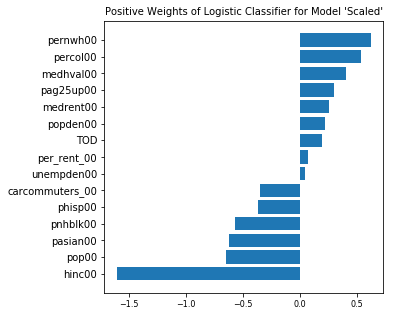

(1, 15)


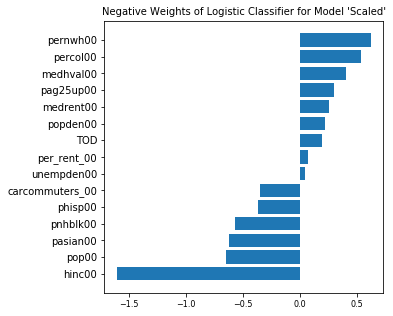

(1, 15)


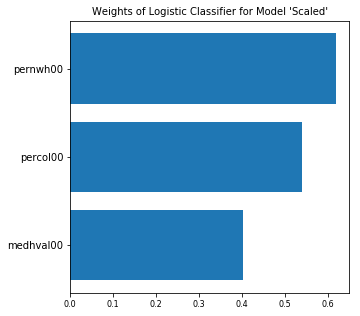

(1, 15)


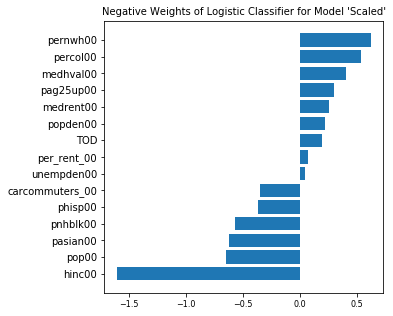

(1, 15)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


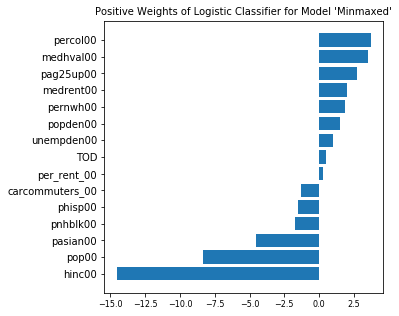

(1, 15)


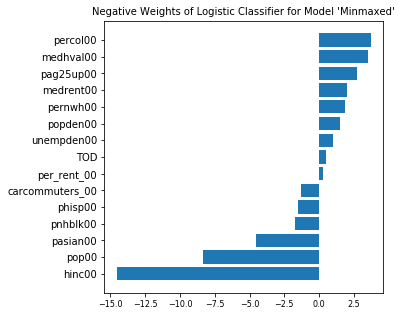

(1, 15)


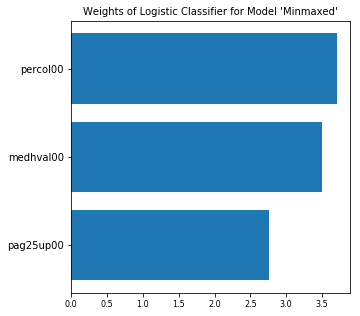

(1, 15)


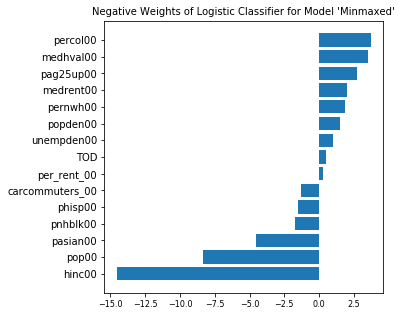

,Minmaxed,Raw,Scaled
Logit,"(-14.5394187343, -8.31358371665, -4.5631442352...","(-3.87860119086e-05, -4.1706324222e-06, -3.655...","(-1.60254088034, -0.650391816208, -0.618559918..."


In [102]:
## Logistic Reeg
imp = {}
for m in models:
#     dictx[m]
#     model[m]
# X_train[m], X_test[m], y_train[m], y_test[m]

    logit_1 = LogisticRegression(C = 10000)
#     print(X_train[m].shape,y_train[m].shape)
    logit_1.fit(X_train[m], y_train[m])
#     print(logit_1.score(X_test[m],y_test[m]))
    model[m]['Logit'] = logit_1.score(X_test[m],y_test[m])
#     resultset[m+'_Logit_predicttyp']=logit_1.predict(dictx[m])
    y_pred = logit_1.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['Logit'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['Logit'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['Logit'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    f_importances_pos(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_neg(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_unimp(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    imp3,names = zip(*sorted(zip(list(logit_1.coef_)[0],np.asarray(list(X_train['Raw'].columns)))))
    names_dict[m]['Logit'] = names
    imp_dict[m]['Logit'] =  imp3
    f_importances_all(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
model_f1_scores
pd.DataFrame(imp_dict)

In [103]:
def featureImportancePlot_dt(rf, labels,m):
    importances = rf.feature_importances_[:]
    indices = np.argsort(importances)[::-1]
    importances_10 = rf.feature_importances_[:][:10]
    indices_10 = np.argsort(importances_10)[::-1]
    #std = np.std([tree.feature_importances_ for tree in rf.estimators_],
    #         axis=0)
    pl.figure(figsize=(5,5))
    pl.title("Feature importances")
    pl.bar(range(indices_10.shape[0]), rf.feature_importances_[indices_10],
       color="SteelBlue", #yerr=std[indices]
           align="center")
    pl.xticks(range(indices_10.shape[0]), np.array(labels)[indices_10], rotation=90)
    pl.xlim([-1, indices_10.shape[0]])
    pl.show()
    print(importances) 
    
    return rf.feature_importances_[indices], np.array(labels)[indices]

# DT

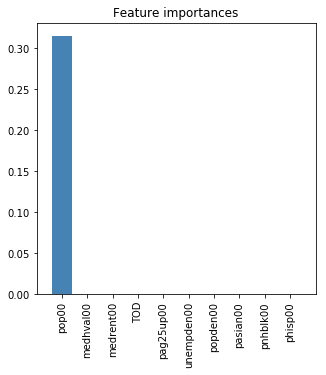

[ 0.31529339  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.34351202  0.
  0.15282993  0.18836466]


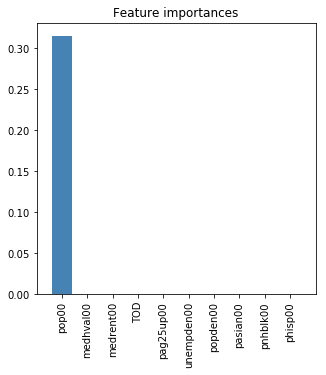

[ 0.31529339  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.34351202  0.
  0.15282993  0.18836466]


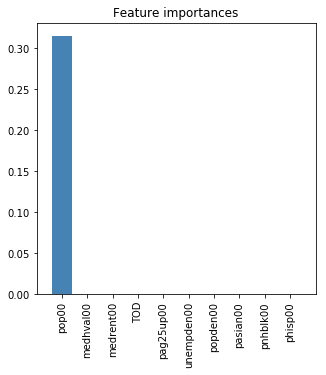

[ 0.31529339  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.34351202  0.
  0.15282993  0.18836466]


{'Minmaxed': {'DT': 0.026490066225165566, 'Logit': 0.33333333333333331},
 'Raw': {'DT': 0.026490066225165566, 'Logit': 0.15094339622641506},
 'Scaled': {'DT': 0.026490066225165566, 'Logit': 0.33333333333333331}}

In [104]:
seed = 5
# print(y_train.shape, X_train.shape)
for m in models:
    #     dictx[m]
    #     model[m]

    OS = []
#     param_grid = {'n_estimators':range(1,11),'max_depth':range(1,11),'max_leaf_nodes':range(2,11)}
#     dt=DecisionTreeClassifier()
#     gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
#     ds=gr.fit(X_train[m],y_train[m])

    for c in range(5):
#         print (ds.best_params_,ds.best_params_['max_depth'],ds.best_params_['max_leaf_nodes'])
        dt=DecisionTreeClassifier()
        dt = DecisionTreeClassifier(max_depth=3)
        dt.fit(X_train[m], y_train[m])
        pred=dt.predict_proba(X_test[m])[:,1]
        OS.append(dt.score(X_test[m],y_test[m]))
    model[m]['DT'] = mean(OS)
#     resultset[m+'_DT_predicttyp']=dt.predict(dictx[m])
    y_pred = dt.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['DT'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['DT'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['DT'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    imp_dict[m]['DT'], names_dict[m]['DT'] =  featureImportancePlot_dt(dt, X_Census_FQpd.columns,m)
model_f1_scores

In [105]:
model_f1_scores['Raw']['DT']

0.026490066225165566

In [106]:
resultset['actualtyp']=y

# Random Forest

In [107]:
def featureImportancePlot(rf, labels,m):
    '''plots feature importance for random forest
    rf: the random forest model fit to the data
    labels: the names of the features
    '''
    
    importances = rf.feature_importances_[:10]
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

    pl.figure()
    pl.title("Feature importances for Model"+ m)
    pl.bar(range(indices.shape[0]), rf.feature_importances_[indices],
       color="SteelBlue", yerr=std[indices], align="center")
    pl.xticks(range(indices.shape[0]), np.array(labels)[indices], rotation=90)
    pl.xlim([-1, indices.shape[0]])
    pl.show()


# def featureImportancePlot(rf, labels,m):
#     '''plots feature importance for random forest
#     rf: the random forest model fit to the data
#     labels: the names of the features
#     '''
#     importances = rf.feature_importances_
#     indices = np.argsort(importances)[::-1]
#     importances_10 = rf.feature_importances_[:10]
#     indices_10 = np.argsort(importances_10)[::-1]
#     std = np.std([tree.feature_importances_ for tree in rf.estimators_],
#              axis=0)

#     pl.figure(figsize=(5,5))
#     pl.title("Feature importances of Random Forest for Model "+m)
#     pl.bar(range(indices_10.shape[0]), rf.feature_importances_[indices_10],
#        color="SteelBlue", yerr=std[indices_10], align="center")
#     pl.xticks(range(indices_10.shape[0]), np.array(labels)[indices_10], rotation=90)
#     pl.xlim([-1, indices_10.shape[0]])
#     pl.show()
#     return rf.feature_importances_[indices], np.array(labels)[indices]

Raw


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 6, 'max_leaf_nodes': 8, 'n_estimators': 10} 6 8
{'max_depth': 6, 'max_leaf_nodes': 8, 'n_estimators': 10} 6 8
{'max_depth': 6, 'max_leaf_nodes': 8, 'n_estimators': 10} 6 8
{'max_depth': 6, 'max_leaf_nodes': 8, 'n_estimators': 10} 6 8
{'max_depth': 6, 'max_leaf_nodes': 8, 'n_estimators': 10} 6 8


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

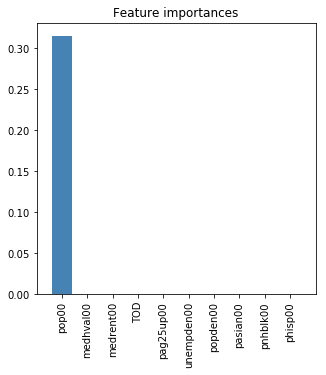

[ 0.31529339  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.34351202  0.
  0.15282993  0.18836466]
Scaled


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 10, 'max_leaf_nodes': 10, 'n_estimators': 10} 10 10
{'max_depth': 10, 'max_leaf_nodes': 10, 'n_estimators': 10} 10 10
{'max_depth': 10, 'max_leaf_nodes': 10, 'n_estimators': 10} 10 10
{'max_depth': 10, 'max_leaf_nodes': 10, 'n_estimators': 10} 10 10
{'max_depth': 10, 'max_leaf_nodes': 10, 'n_estimators': 10} 10 10


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

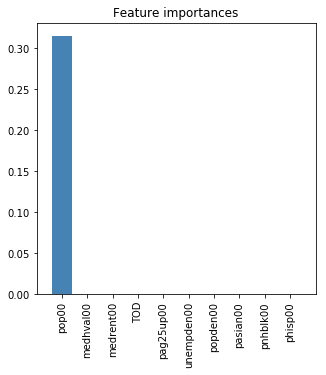

[ 0.31529339  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.34351202  0.
  0.15282993  0.18836466]
Minmaxed


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 8, 'max_leaf_nodes': 10, 'n_estimators': 10} 8 10
{'max_depth': 8, 'max_leaf_nodes': 10, 'n_estimators': 10} 8 10
{'max_depth': 8, 'max_leaf_nodes': 10, 'n_estimators': 10} 8 10
{'max_depth': 8, 'max_leaf_nodes': 10, 'n_estimators': 10} 8 10
{'max_depth': 8, 'max_leaf_nodes': 10, 'n_estimators': 10} 8 10


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

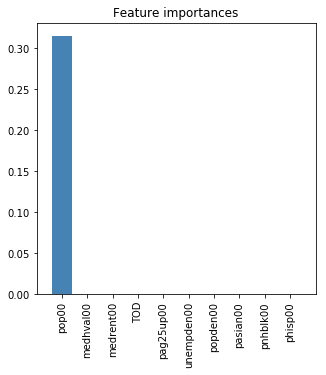

[ 0.31529339  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.34351202  0.
  0.15282993  0.18836466]


{'Minmaxed': {'DT': 0.026490066225165566,
  'Logit': 0.33333333333333331,
  'RF': 0.040540540540540536},
 'Raw': {'DT': 0.026490066225165566,
  'Logit': 0.15094339622641506,
  'RF': 0.090322580645161285},
 'Scaled': {'DT': 0.026490066225165566,
  'Logit': 0.33333333333333331,
  'RF': 0.0522875816993464}}

In [108]:
for m in models:
    #     dictx[m]
    print(m)
    param_grid = {'max_depth':range(1,11),'n_estimators':range(1,11),'max_leaf_nodes':range(2,11)}
    rf=RandomForestClassifier()
    gr=GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
    rs=gr.fit(X_train[m],y_train[m])
    OS = []
    for c in range(5):
        print(rs.best_params_,rs.best_params_['max_depth'],rs.best_params_['max_leaf_nodes'])
        rf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
        rf.fit(X_train[m], y_train[m])
        pred=rf.predict_proba(X_test[m])[:,1]
        OS.append(rf.score(X_test[m],y_test[m]))
    model[m]['RF'] = mean(OS)
    resultset[m+'_RF_predicttyp']=rf.predict(dictx[m])
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['RF'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['RF'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['RF'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    imp_dict[m]['RF'], names_dict[m]['RF'] =  featureImportancePlot_dt(dt, X_Census_FQpd.columns,m)
model_f1_scores

#### Note that the features have changed considerably with the updated binary typology-- users and checkins were the most important features initially.

# SVM

In [109]:
model
def f_importances_neg(coef, names,m):
    
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[:20]
    names = names[:20]
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)  
    plt.xticks(size = 8)
    plt.show()
def f_importances_pos(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[-20:]
    names = names[-20:]
    plt.figure(figsize=(5,5))
    plt.title('Positive Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()
def f_importances_unimp(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    lenimp_2 = len(imp)//2
    imp = imp[lenimp_2-10:lenimp_2+10]
    names = names[lenimp_2-10:lenimp_2+10]
    plt.figure(figsize=(5,5))
    plt.title('Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()
def f_importances_all(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()



Raw
0.82120838471
0.82120838471
(1, 15)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


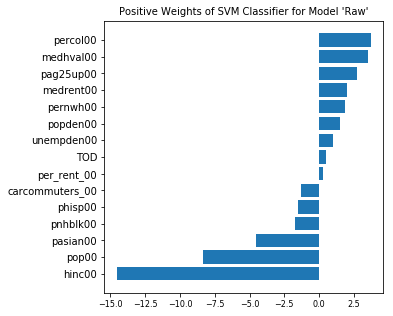

(1, 15)


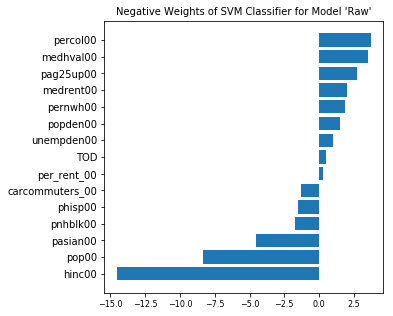

(1, 15)


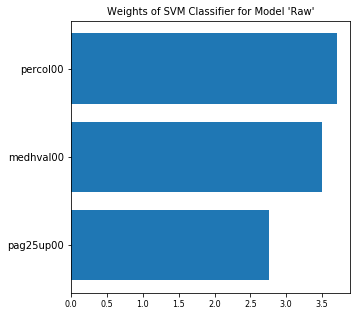

Scaled
0.843403205919
0.843403205919
(1, 15)


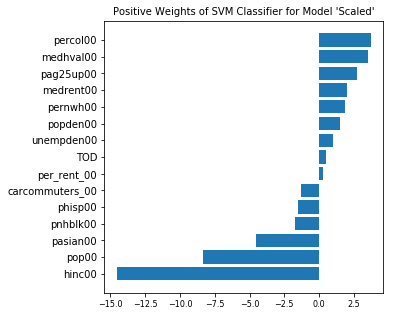

(1, 15)


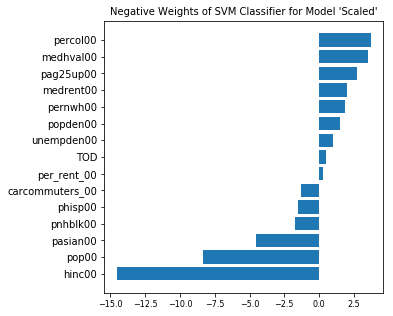

(1, 15)


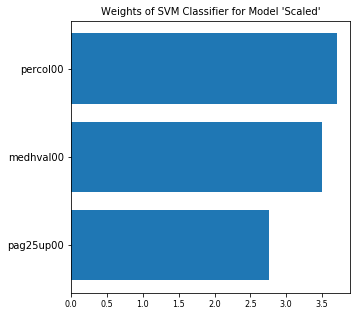

Minmaxed
0.82120838471
0.82120838471
(1, 15)


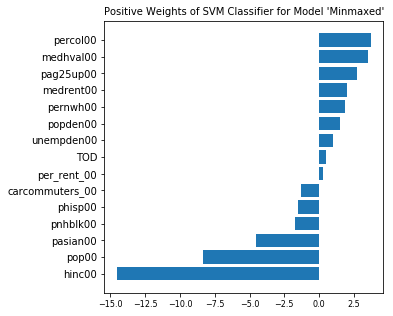

(1, 15)


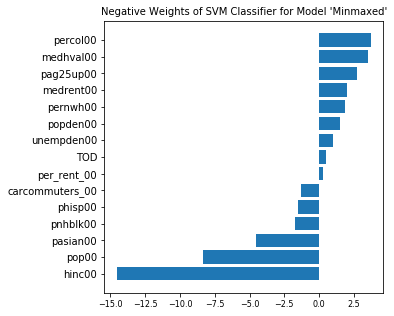

(1, 15)


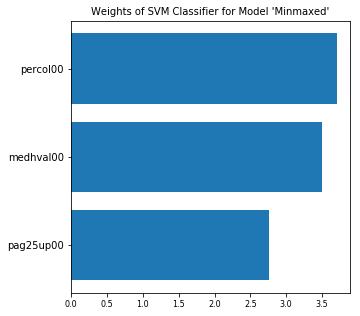

{'Minmaxed': {'DT': 0.026490066225165566,
  'Logit': 0.33333333333333331,
  'RF': 0.040540540540540536,
  'SVM': 0.040540540540540536},
 'Raw': {'DT': 0.026490066225165566,
  'Logit': 0.15094339622641506,
  'RF': 0.090322580645161285,
  'SVM': 0.0},
 'Scaled': {'DT': 0.026490066225165566,
  'Logit': 0.33333333333333331,
  'RF': 0.0522875816993464,
  'SVM': 0.25961538461538464}}

In [110]:

# When C is very small, we are willing to tolerate more mistakes. If C is very big, this
# means we hardly tolerate any mistakes. So, we cannot choose a very large C if our data is not
# really separable. Let's however choose from a broad range of reasonable options.
# param_grid = {'kernel':['linear'],'C':[np.exp(i) for i in np.linspace(-10,10,10)]}
for m in models:
    print(m)
    OS = []
    #     dictx[m]
        #     model[m]
    rr = svm.SVC(gamma='auto')
    rr.fit(X_train[m], y_train[m])
    correct=1.0*(rr.predict(X_test[m])==np.asarray(y_test[m])).sum()/len(y_test[m])
    print(correct)
    print(rr.score(X_test[m],y_test[m]))
    OS.append(correct)
#     resultset[m+'_SVM_predicttyp']=rr.predict(dictx[m])
    model[m]['SVM'] = mean(OS)
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['SVM'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['SVM'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['SVM'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    f_importances_pos(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_neg(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_unimp(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    imp3,names = zip(*sorted(zip(list(logit_1.coef_)[0],np.asarray(list(X_train['Raw'].columns)))))
    names_dict[m]['SVM'] = names
    imp_dict[m]['SVM'] = imp3 
model_f1_scores

# Summary of Results

In [111]:
X_Census_FQpd.columns

Index(['pop00', 'phisp00', 'pnhblk00', 'pasian00', 'popden00', 'unempden00',
       'pag25up00', 'TOD', 'medrent00', 'medhval00', 'percol00', 'per_rent_00',
       'pernwh00', 'hinc00', 'carcommuters_00'],
      dtype='object')

In [112]:
X_Census_FQpd.shape

(2702, 15)

In [113]:
df1 = pd.DataFrame(model_f1_scores)
df2 = pd.DataFrame(model_recall_scores)
df3 =pd.DataFrame(model_precision_scores)
result = pd.concat([df1, df2,df3], axis=1, sort=False)
result

,Minmaxed,Raw,Scaled,Minmaxed,Raw,Scaled,Minmaxed,Raw,Scaled
DT,0.026490,0.026490,0.026490,0.013793,0.013793,0.013793,0.333333,0.333333,0.333333
Logit,0.333333,0.150943,0.333333,0.227586,0.082759,0.227586,0.622642,0.857143,0.622642
RF,0.040541,0.090323,0.052288,0.020690,0.048276,0.027586,1.000000,0.700000,0.500000
SVM,0.040541,0.000000,0.259615,0.020690,0.000000,0.186207,1.000000,0.000000,0.428571


In [114]:
model_name

'1_CENSUS_pct_ch_hinc00_16'

In [115]:
result.to_csv('./Results/Scores'+model_name+'.csv')

In [116]:
names_pd = pd.DataFrame()
counter = {}
for m in models:
    print(m)
    for standarized in modelslist:
        for i, weights in enumerate(names_dict[m][standarized]):
            standarized_m = str(standarized)+'_'+str(m)
            names_pd.loc[standarized_m,weights] = imp_dict[m][standarized][i]


Raw
Scaled
Minmaxed


In [117]:
for i in names_pd.index:
    print(names_pd.loc[i].idxmax())

medhval00
per_rent_00
per_rent_00
percol00
pernwh00
per_rent_00
per_rent_00
percol00
percol00
per_rent_00
per_rent_00
percol00


In [118]:
model_name

'1_CENSUS_pct_ch_hinc00_16'

In [119]:
names_pd.to_csv('./Results/'+model_name+'.csv')
names_pd

,hinc00,pop00,medrent00,unempden00,carcommuters_00,pernwh00,pag25up00,pnhblk00,phisp00,per_rent_00,pasian00,percol00,TOD,popden00,medhval00
Logit_Raw,-0.000039,-0.000004,-3.655006e-07,-1.341478e-08,-5.531776e-10,-5.370368e-10,-3.298383e-10,-2.354077e-10,-1.806721e-10,-1.570454e-10,-1.085162e-10,5.411888e-11,2.159523e-10,2.565404e-10,0.000004
DT_Raw,0.152830,0.315293,0.000000e+00,0.000000e+00,1.883647e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.435120e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
RF_Raw,0.152830,0.315293,0.000000e+00,0.000000e+00,1.883647e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.435120e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
SVM_Raw,-14.539419,-8.313584,2.003896e+00,9.794215e-01,-1.299264e+00,1.904124e+00,2.763856e+00,-1.757617e+00,-1.546643e+00,2.819169e-01,-4.563144e+00,3.704702e+00,4.985131e-01,1.507988e+00,3.502929
Logit_Scaled,-1.602541,-0.650392,2.567971e-01,4.655642e-02,-3.445995e-01,6.194275e-01,3.001969e-01,-5.669257e-01,-3.631845e-01,6.973736e-02,-6.185599e-01,5.392946e-01,1.940379e-01,2.245124e-01,0.402016
DT_Scaled,0.152830,0.315293,0.000000e+00,0.000000e+00,1.883647e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.435120e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
RF_Scaled,0.152830,0.315293,0.000000e+00,0.000000e+00,1.883647e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.435120e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
SVM_Scaled,-14.539419,-8.313584,2.003896e+00,9.794215e-01,-1.299264e+00,1.904124e+00,2.763856e+00,-1.757617e+00,-1.546643e+00,2.819169e-01,-4.563144e+00,3.704702e+00,4.985131e-01,1.507988e+00,3.502929
Logit_Minmaxed,-14.539419,-8.313584,2.003896e+00,9.794215e-01,-1.299264e+00,1.904124e+00,2.763856e+00,-1.757617e+00,-1.546643e+00,2.819169e-01,-4.563144e+00,3.704702e+00,4.985131e-01,1.507988e+00,3.502929
DT_Minmaxed,0.152830,0.315293,0.000000e+00,0.000000e+00,1.883647e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.435120e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


- You can refer to https://github.com/mv1742/updny_2